In [46]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 300)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import sys
sys.path.append(os.path.abspath('../'))

import warnings
warnings.filterwarnings("ignore")

from server2022.src.train_val import *
from server2022.src.model_features import *
from server2022.data.processed.prepare_data import *


OUTPUT_FILE = '../reports/0_30_90_comp_0_years.csv'

TARGET_DICT = {'1': 'binary_target', '2': 'target_more30days', '3': 'target_more90days'}
'''Choose target: 
    1 - binary_target
    2 - target_more30days
    3 - target_more90days
'''

'Choose target: \n    1 - binary_target\n    2 - target_more30days\n    3 - target_more90days\n'

# Проведем эксперименты для задачи новых клиентов и случаев ПДЗ > 0 дней, ПДЗ > 30 дней, ПДЗ > 90 дней

На самом деле было проведено сильно больше экспериментов. В данном ноутбуке только те, результаты по которым были сведены в презентацию

In [47]:
TARGET_COL = TARGET_DICT['1']
COMMENT_PREFIX = '0 '

In [48]:
model = CatBoostClassifier(iterations=1500,
                               depth=5, 
                               l2_leaf_reg=5, 
                               learning_rate=0.001, # 0.01433
                               loss_function='Logloss',
                               use_best_model=False,
                               eval_metric='AUC',
                               verbose=False,
                               class_weights=[1, 0.01], #0.0006
                               random_seed=RANDOM_STATE,
                              )

## add_growth=True + use_diff_features=True

In [49]:
df = create_df_0years_known(add_growth=True, count_log_fin_vals=False, normalize_fin_columns=False, drop_zeros=False)

In [50]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=True, use_ratio_features=False)

Target = binary_target
Fitting model <catboost.core.CatBoostClassifier object at 0x000002299EC70A90> with threshold = 0.046...


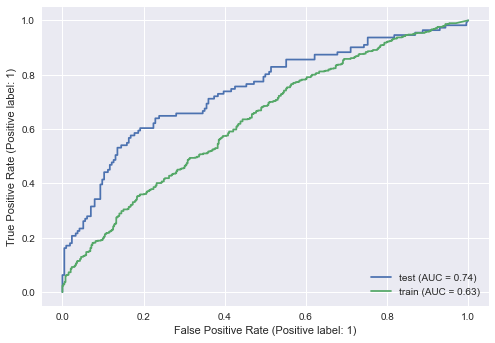

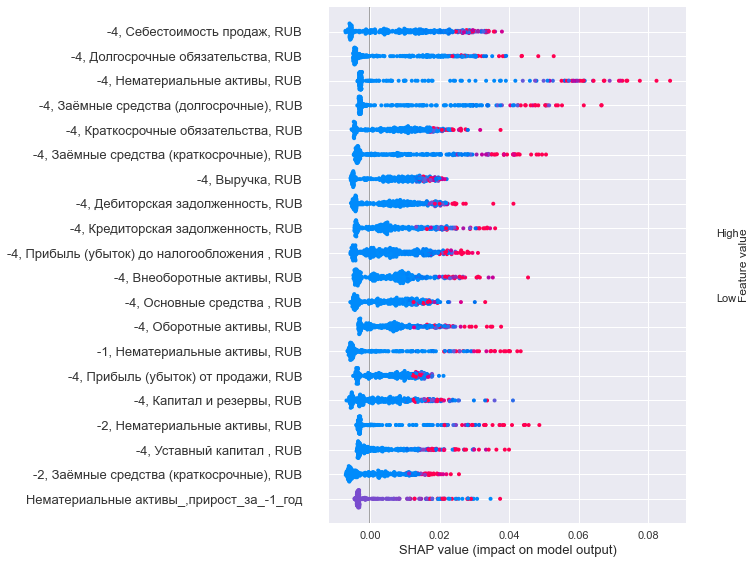


TRAIN: F1 = 0.584, Precision = 0.729, Recall = 0.487, Accuracy = 0.562, ROC_AUC = 0.634
TEST: F1 = 0.582, Precision = 0.449, Recall = 0.829, Accuracy = 0.594, ROC_AUC = 0.742



In [51]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment=COMMENT_PREFIX + '2 + 4')

In [53]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=True, use_ratio_features=False)

Target = binary_target
Fitting model <catboost.core.CatBoostClassifier object at 0x000002299EC70A90> with threshold = 0.0461...


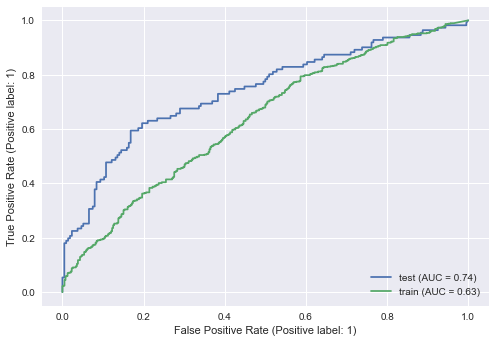

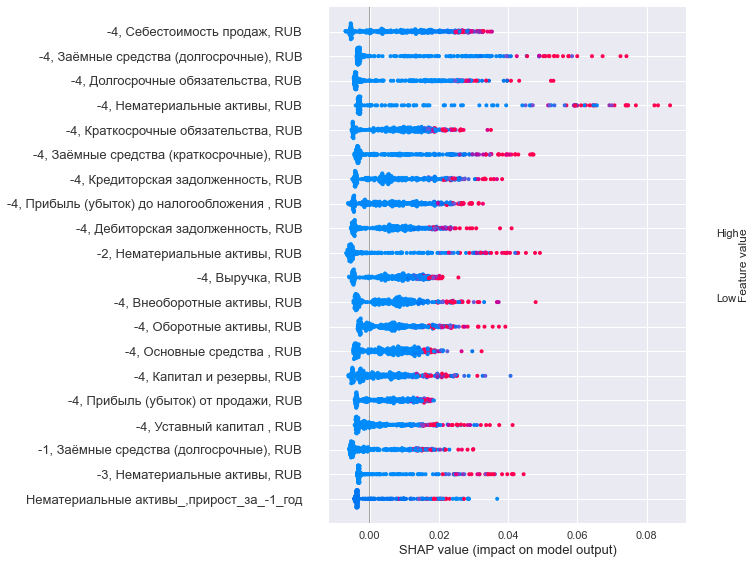


TRAIN: F1 = 0.574, Precision = 0.723, Recall = 0.476, Accuracy = 0.555, ROC_AUC = 0.634
TEST: F1 = 0.574, Precision = 0.447, Recall = 0.802, Accuracy = 0.594, ROC_AUC = 0.739



In [54]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment=COMMENT_PREFIX + '2 + 4 + 6')

In [61]:
TARGET_COL = TARGET_DICT['2']
COMMENT_PREFIX = '30 '

In [62]:
model = CatBoostClassifier(iterations=1500,
                               depth=4, 
                               l2_leaf_reg=8.8, 
                               learning_rate=0.0192, # 0.01433
                               loss_function='Logloss',
                               use_best_model=False,
                               eval_metric='AUC',
                               verbose=False,
                               class_weights=[1, 0.1], #0.0006
                               random_seed=RANDOM_STATE,
                              )

## add_growth=True + use_diff_features=True

In [63]:
df = create_df_0years_known(add_growth=True, count_log_fin_vals=False, normalize_fin_columns=False, drop_zeros=False)

In [64]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=True, use_ratio_features=False)

Target = target_more30days
Fitting model <catboost.core.CatBoostClassifier object at 0x000002299D592CA0> with threshold = 0.01419...


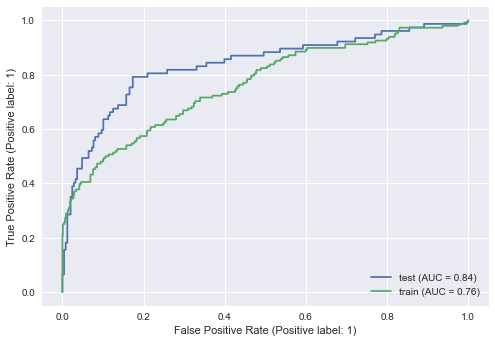

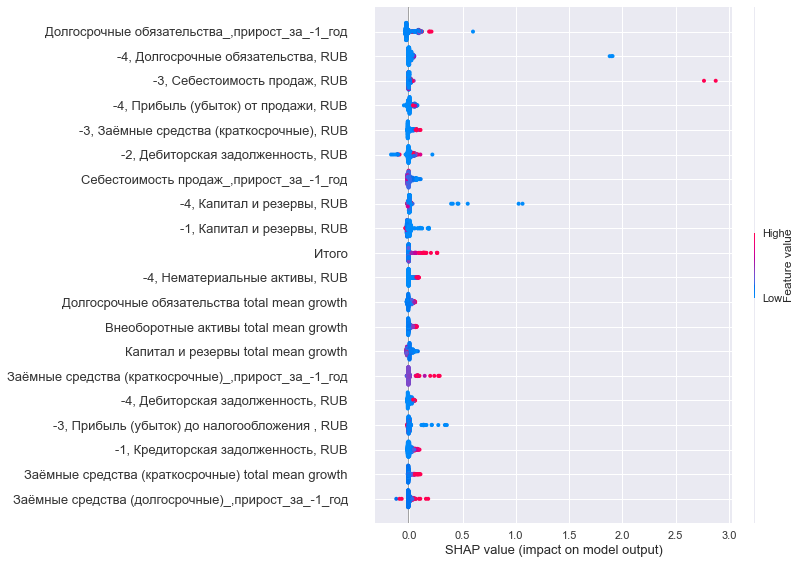


TRAIN: F1 = 0.375, Precision = 0.256, Recall = 0.703, Accuracy = 0.673, ROC_AUC = 0.765
TEST: F1 = 0.553, Precision = 0.411, Recall = 0.844, Accuracy = 0.677, ROC_AUC = 0.836



In [65]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment=COMMENT_PREFIX + '2 + 4')

In [75]:
TARGET_COL = TARGET_DICT['3']
COMMENT_PREFIX = '90 '

In [76]:
model = CatBoostClassifier(iterations=1500,
                               depth=4, 
                               l2_leaf_reg=8.8, 
                               learning_rate=0.0192, # 0.01433
                               loss_function='Logloss',
                               use_best_model=False,
                               eval_metric='AUC',
                               verbose=False,
                               class_weights=[1, 0.1], #0.0006
                               random_seed=RANDOM_STATE,
                              )

## add_growth=True + use_diff_features=True + normalize_fin_columns=True

In [80]:
df = create_df_0years_known(add_growth=True, count_log_fin_vals=False, normalize_fin_columns=True, drop_zeros=False)

In [81]:
feat_gen = Feature_gen(-2, -1)
df = feat_gen.preprocessing_before_fitting(df, use_diff_features=True, use_ratio_features=False)

Target = target_more90days
Fitting model <catboost.core.CatBoostClassifier object at 0x000002299EAFE490> with threshold = 0.00404...


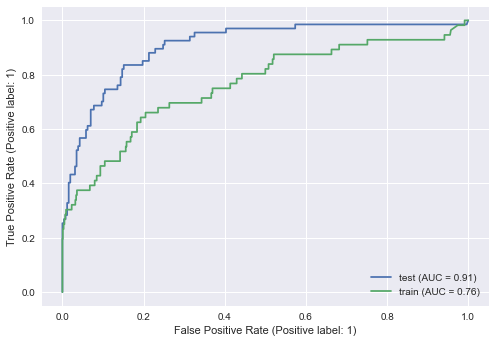

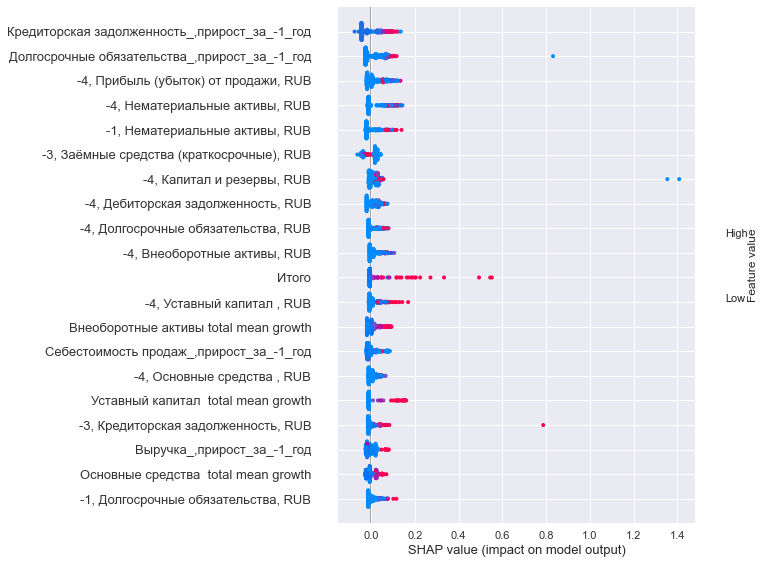


TRAIN: F1 = 0.169, Precision = 0.095, Recall = 0.75, Accuracy = 0.611, ROC_AUC = 0.764
TEST: F1 = 0.546, Precision = 0.38, Recall = 0.97, Accuracy = 0.668, ROC_AUC = 0.907



In [82]:
make_report_with_best_threshold(model, df, to_file=True, target_col=TARGET_COL, num_random_states=5,
                                file_path=OUTPUT_FILE, comment=COMMENT_PREFIX + '2 + 4 + 6')